In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SQL/SQL_output.csv")
df if df.isna().sum(axis=1).any() else print("No missing values") # checking for null values



No missing values


In [3]:
df

,quantity,date,time,size,pizza_type_id,price,category,ingredients
0,1,2015-01-03,14:22:10,M,hawaiian,13.25,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,1,2015-01-03,14:32:51,XL,the_greek,25.50,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
2,1,2015-01-03,14:40:42,S,mediterraneo,12.00,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie..."
3,1,2015-01-03,14:48:45,M,spinach_fet,16.00,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
4,1,2015-01-03,14:49:58,M,pepperoni,12.50,Classic,"Mozzarella Cheese, Pepperoni"
...,...,...,...,...,...,...,...,...
48615,1,2015-12-31,14:40:24,L,southw_ckn,20.75,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
48616,1,2015-12-31,14:40:24,M,southw_ckn,16.75,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
48617,1,2015-12-31,14:40:24,S,spicy_ital,12.50,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ..."
48618,1,2015-12-31,14:43:46,L,napolitana,20.50,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."


In [4]:
df.rename(columns={'pizza_type_id': 'pizza_flavor'}, inplace=True) # I think this name is more appropriate


In [45]:
df.groupby(df['category'])['quantity'].count() / df['quantity'].count() 
# getting percentage of each category
# so that we can weigh the popularity of each category
# later we see the unique values of each category
# we see that supreme and veggie are overrepresented by the shop
# if we standardized the count percentage by the number of unique values
# in each category, we would get a better representation of popularity 
# relative to the unique flavors the restuarant offers.

# my predicition is that the most popular pizza flavor
# per unique flavor per category is the chicken category
# I would recommend the restuarant to offer more chicken flavors
# As well as reduce the number of supreme and veggie flavors



category
Chicken    0.222439
Classic    0.299856
Supreme    0.242225
Veggie     0.235479
Name: quantity, dtype: float64

In [19]:
unique_flavors_per_category = df.groupby('category')['pizza_flavor'].nunique()
unique_flavors_per_category

category
Chicken    6
Classic    8
Supreme    9
Veggie     9
Name: pizza_flavor, dtype: int64

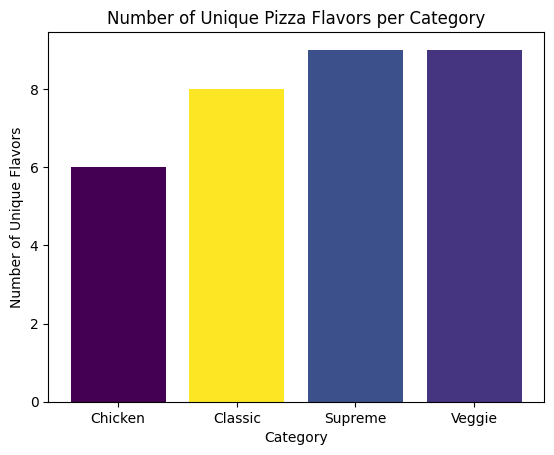

In [42]:

# Calculate total quantity for each category so that we can showcase the most popular categories
total_quantity_per_category = df.groupby('category')['quantity'].sum()
# Normalize quantities to a range between 0 and 1 so that we can use them in a color gradient
normalized_quantities = (total_quantity_per_category - total_quantity_per_category.min()) / (total_quantity_per_category.max() - total_quantity_per_category.min()) 
"""
1. First part subtracts the minimum quantity in the dataset from each quantity. 
This effectively shifts the entire dataset so that the smallest value is now 0.

2. Second part divides each quantity by the range of the dataset.
This part is a little tricky. The range of the dataset is the difference between the maximum and minimum values.
 """


# Adding a color gradient for detail
cmap = plt.get_cmap('viridis')
colors = cmap(normalized_quantities)

# Plot number of unique flavors per category with these colors
plt.bar(unique_flavors_per_category.index, unique_flavors_per_category.values, color=colors)

plt.title('Number of Unique Pizza Flavors per Category')
plt.xlabel('Category')
plt.ylabel('Number of Unique Flavors')

plt.show()

# this kinda sucks because the legend is not showing the correct colors
